**Introduction**
Google Trends presents a good opportunity to track the public's interest in a topic in real time and across time. Google Trends has been used in academic research to predict Zika virus outbreak, Influenza and Dengue fever. 

We will be using Google search queries of the keywords to explore the relationship between popularity of the virus in search queries and the actual confirmed cases.

The google trends data is normalized by Google on a scale of 0-100, larger representing a higher proportion search or popularity of the keyword in Singapore. Therefore, when comparing between queries, we are limited to looking at the correlation of Google search queries proportion and confirmed cases rather than a direct comparison of the search queries counts.

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

In [134]:
# import trends file, to be merged with dengue cases
trends = pd.read_csv('../../assets/complete_google_trends.csv', index_col=0)

In [135]:
trends.head()

,date,year,month,week,dengue_search,dengue_fever_search,rashes_search,vomiting_search,eye_pain_search,joint_pain_search,fever_search,wolbachia_search,headache_search,nausea_search,fogging_search,insect_repellent_search,insecticide_search
0,2014-06-01,2014,1,1,44,52,67,43,30,27,73,0,22,9,0,1,1
1,2014-13-01,2014,1,2,38,53,73,38,0,26,66,2,25,11,0,3,2
2,2014-20-01,2014,1,3,31,60,60,52,12,13,80,0,27,8,0,3,0
3,2014-27-01,2014,1,4,23,24,57,39,31,0,64,0,25,12,0,3,1
4,2014-03-02,2014,2,5,28,44,56,31,0,7,72,0,22,8,0,3,0


In [136]:
# import dengue cases file
dengue_df = pd.read_csv('../../assets/dengue.csv')

In [137]:
dengue_df.head()

,type_dengue,date,year,month,number
0,Dengue,2014-01-06,2014,1,436.0
1,DHF,2014-01-06,2014,1,1.0
2,Dengue,2014-01-13,2014,1,479.0
3,DHF,2014-01-13,2014,1,0.0
4,Dengue,2014-01-20,2014,1,401.0


In [138]:
# sum up dengue and DHF cases, as DHF is rare and is considered as a dengue case
dengue_df['dengue_sum'] = dengue_df.groupby('date')['number'].transform('sum')

In [139]:
# drop the two columns which are redundant
dengue_df = dengue_df.drop(['number', 'type_dengue'], axis=1)

In [140]:
# drop the rows with duplicate value of the sum
dengue_df = dengue_df.drop_duplicates(subset='date')

In [141]:
dengue_df.head()

,date,year,month,dengue_sum
0,2014-01-06,2014,1,437.0
2,2014-01-13,2014,1,479.0
4,2014-01-20,2014,1,401.0
6,2014-01-27,2014,1,336.0
8,2014-02-03,2014,2,234.0


In [142]:
# merge the dengue cases df with google trends df
merged_df = pd.merge(trends, dengue_df, on=['date', 'year', 'month'])

In [143]:
merged_df

,date,year,month,week,dengue_search,dengue_fever_search,rashes_search,vomiting_search,eye_pain_search,joint_pain_search,fever_search,wolbachia_search,headache_search,nausea_search,fogging_search,insect_repellent_search,insecticide_search,dengue_sum
0,2014-03-03,2014,3,9,31,54,42,30,10,14,56,2,20,10,28,9,0,187.0
1,2014-05-05,2014,5,18,18,46,47,32,12,0,69,0,24,15,0,3,2,251.0
2,2014-07-07,2014,7,27,64,100,64,24,17,20,89,0,22,7,0,3,4,891.0
3,2015-02-02,2015,2,5,18,27,42,38,0,13,56,0,27,12,0,2,0,212.0
4,2016-04-04,2016,4,13,34,50,39,46,12,8,64,0,28,13,0,4,1,291.0
5,2016-06-06,2016,6,22,27,33,34,49,9,7,71,0,27,11,19,3,0,158.0
6,2016-08-08,2016,8,31,22,20,41,41,0,0,64,0,22,14,0,5,1,197.0
7,2016-10-10,2016,10,40,27,23,46,46,15,17,66,2,29,5,0,6,2,94.0
8,2016-12-12,2016,12,49,10,0,58,60,15,12,45,0,27,10,0,4,3,81.0


**EDA**
1. Find correlations
2. add interaction terms for those with strong correlations

In [144]:
merged_df.corr()

/var/folders/t4/n89gfp4s10b4j476kq4xh2p00000gn/T/ipykernel_59763/4191659586.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_df.corr()


,year,month,week,dengue_search,dengue_fever_search,rashes_search,vomiting_search,eye_pain_search,joint_pain_search,fever_search,wolbachia_search,headache_search,nausea_search,fogging_search,insect_repellent_search,dengue_sum
year,1.000000,0.483836,0.473585,-0.406801,-0.691437,-0.363338,0.870390,-0.165837,-0.188099,-0.346818,-0.129641,0.678667,-0.022111,-0.235857,-0.101057,-0.541951
month,0.483836,1.000000,0.999825,-0.145023,-0.405558,0.487978,0.559740,0.436248,0.107264,-0.097936,0.028820,0.247786,-0.428616,-0.358333,0.035944,-0.137222
week,0.473585,0.999825,1.000000,-0.144742,-0.403443,0.499442,0.552824,0.435796,0.114847,-0.098215,0.028209,0.244342,-0.432858,-0.363464,0.031123,-0.131738
dengue_search,-0.406801,-0.145023,-0.144742,1.000000,0.913206,0.384652,-0.624601,0.404930,0.521899,0.823581,0.040845,-0.354011,-0.449467,0.053673,0.008915,0.896763
dengue_fever_search,-0.691437,-0.405558,-0.403443,0.913206,1.000000,0.332571,-0.815871,0.358038,0.352991,0.795792,-0.014439,-0.489641,-0.194433,0.122857,-0.030476,0.893496
rashes_search,-0.363338,0.487978,0.499442,0.384652,0.332571,1.000000,-0.193998,0.586547,0.502002,0.224263,-0.112970,-0.202738,-0.445649,-0.416305,-0.147114,0.592207
vomiting_search,0.870390,0.559740,0.552824,-0.624601,-0.815871,-0.193998,1.000000,0.027386,-0.151802,-0.605246,-0.137018,0.706597,0.001168,-0.149923,-0.106807,-0.673948
eye_pain_search,-0.165837,0.436248,0.435796,0.404930,0.358038,0.586547,0.027386,1.000000,0.472652,0.285731,0.228429,0.133045,-0.567255,-0.036096,0.113961,0.324445
joint_pain_search,-0.188099,0.107264,0.114847,0.521899,0.352991,0.502002,-0.151802,0.472652,1.000000,0.144491,0.437079,0.089356,-0.878568,0.083945,0.174218,0.387759
fever_search,-0.346818,-0.097936,-0.098215,0.823581,0.795792,0.224263,-0.605246,0.285731,0.144491,1.000000,-0.160100,-0.233478,-0.228665,-0.108133,-0.281807,0.796097


/var/folders/t4/n89gfp4s10b4j476kq4xh2p00000gn/T/ipykernel_59763/219181551.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merged_df.corr()


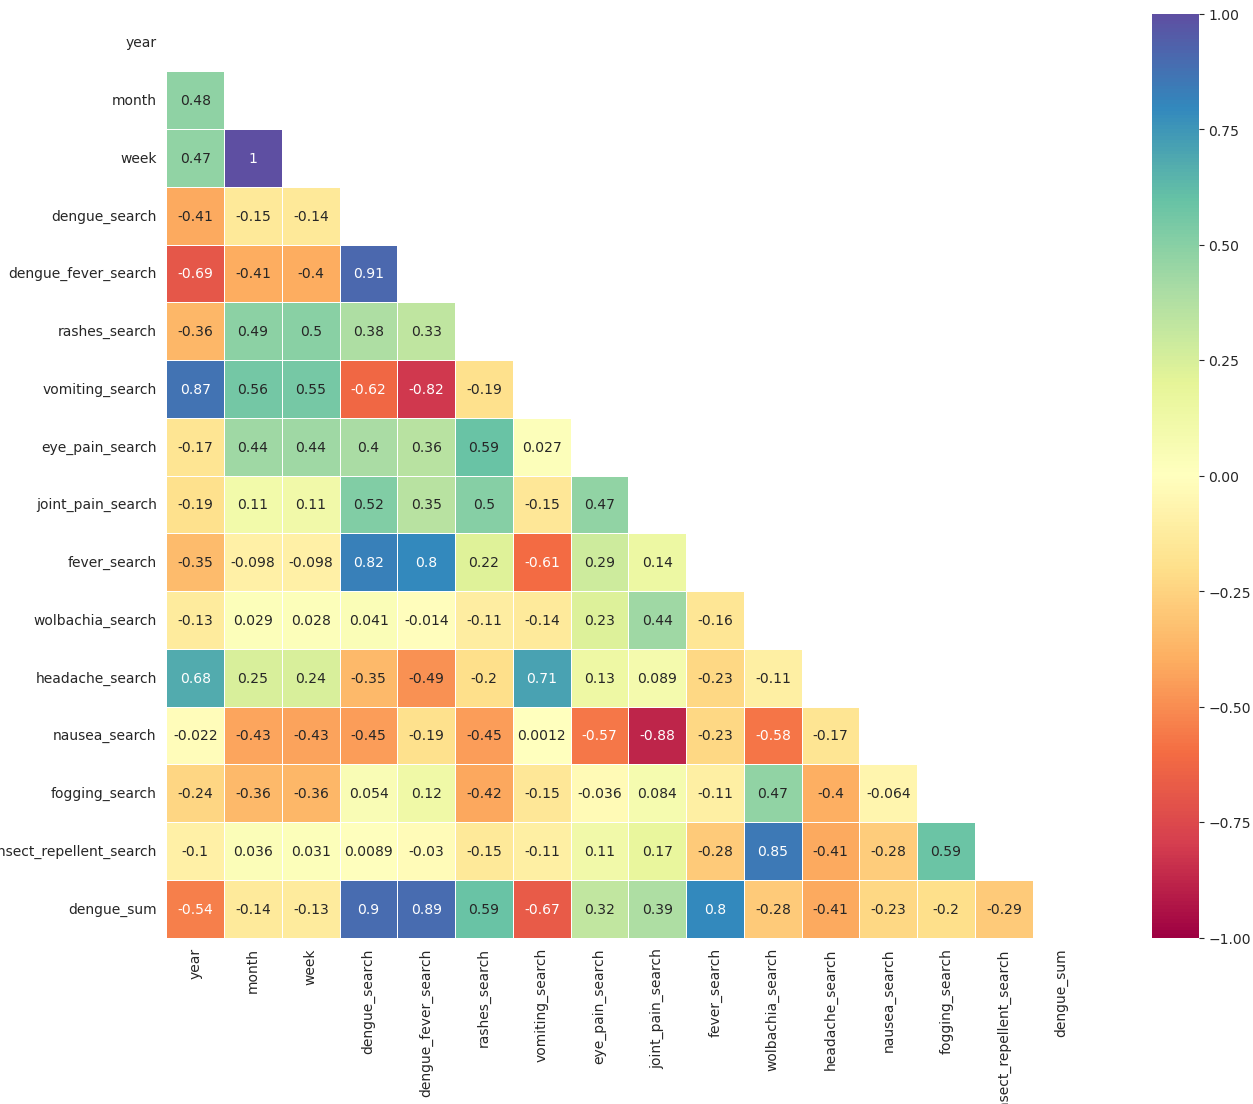

In [145]:
# Get correlation of the remaining features after cleaning
plt.figure(figsize = (16,12))

corr = merged_df.corr()

# Set up mask to be "True" in the upper triangle. this is to reduce the number of 'squares' seen in the correlation heatmap
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5, cmap='Spectral')

**Observations :**
1. Dengue cases are correlated with the search terms 'dengue', 'dengue_fever', 'fever', and 'vomitting'
2. We can introduce interaction terms for these with strong correlation. 
    * 'Fever' has a strong corr with 'dengue' and 'denger_fever'
    * 'Dengue_fever' has a strong correlation with 'dengue'
    * 'Vomitting' has a strong negative correlation with 'dengue_fever'
3. These strong correlations also aludes to the common symptoms of dengue
4. Interestingly, there is a weak correlations between 'fogging' and 'wolbacia' with 'dengue_sum'. In fact, it is negatively correlated. 
    * this might shed some light that awareness on fogging and wolbachia is lower when dengue cases are high.
    * we need to investigate further with more EDA below


In [146]:
# interaction term between 'fever' and 'dengue'
merged_df['fever_and_dengue'] = merged_df['fever_search'] * merged_df['dengue_search']

# interaction term between 'dengue_fever' and 'dengue'
merged_df['denguefever_and_dengue'] = merged_df['dengue_fever_search'] * merged_df['dengue_search']

# interaction term between 'vomitting' and 'dengue_fever'
merged_df['vomitting_and_denguefever'] = merged_df['dengue_fever_search'] * merged_df['vomiting_search']

/var/folders/t4/n89gfp4s10b4j476kq4xh2p00000gn/T/ipykernel_59763/219181551.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merged_df.corr()


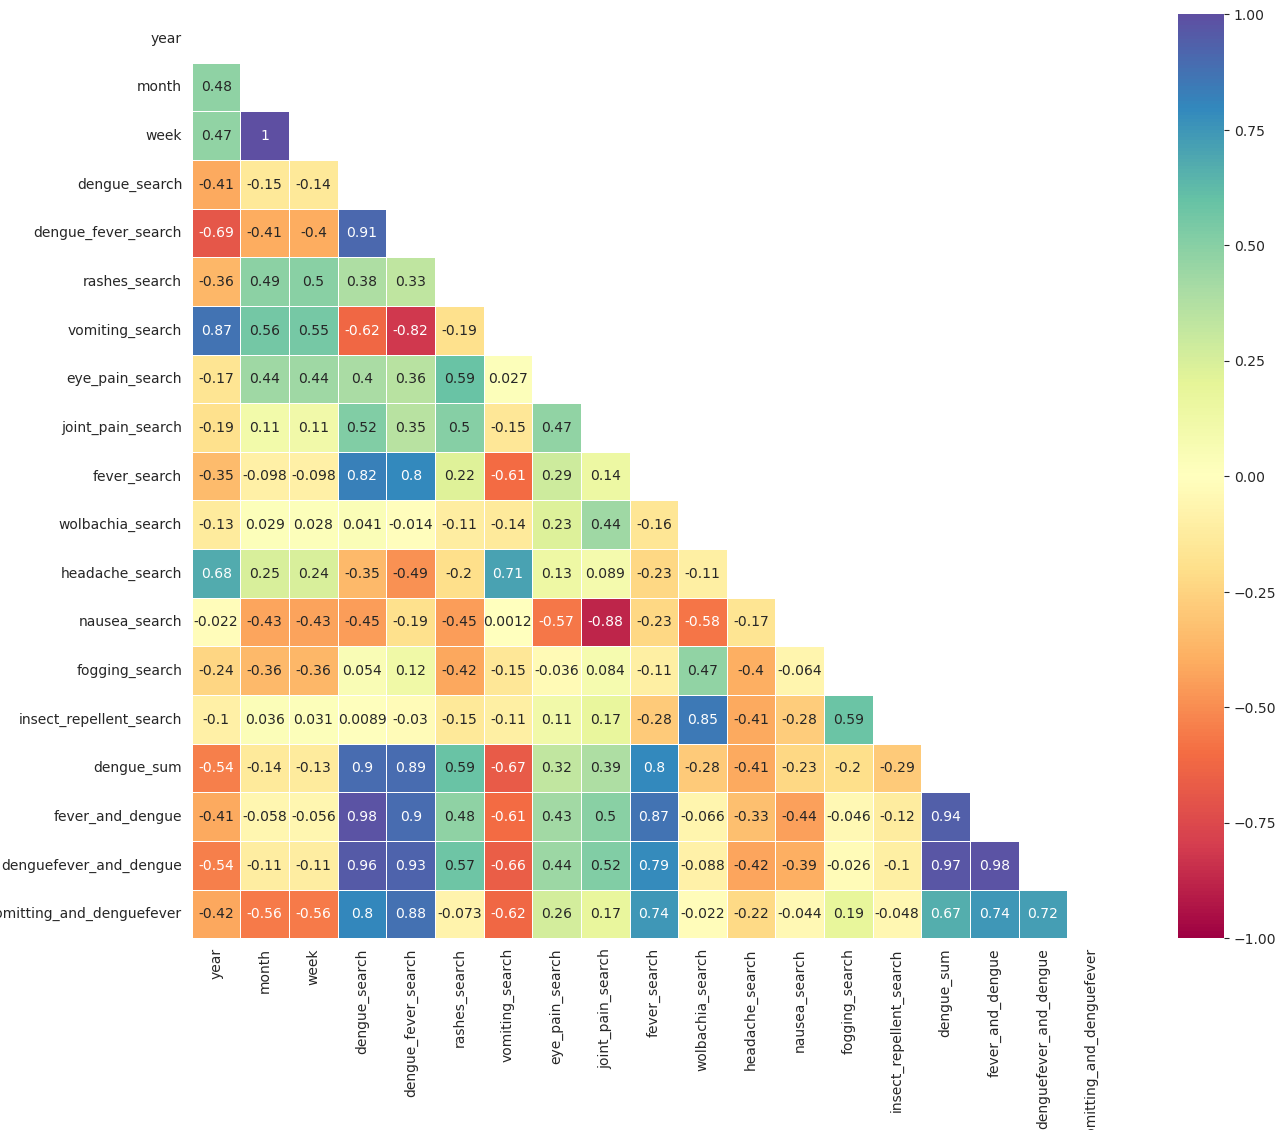

In [147]:
# Get correlation of the remaining features after cleaning
plt.figure(figsize = (16,12))

corr = merged_df.corr()

# Set up mask to be "True" in the upper triangle. this is to reduce the number of 'squares' seen in the correlation heatmap
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5, cmap='Spectral')

**Recommendation**: use interaction terms for modelling instead of the individual terms as it absorbs the dependencies of highly correlated variables.

In [148]:
# next, we can group the search term by symptoms, and see how it moves with the number of cases

# the common symptoms of dengue are: vomitting/nausea, rash, aches and pain (eye-pain), fever, joint-pain

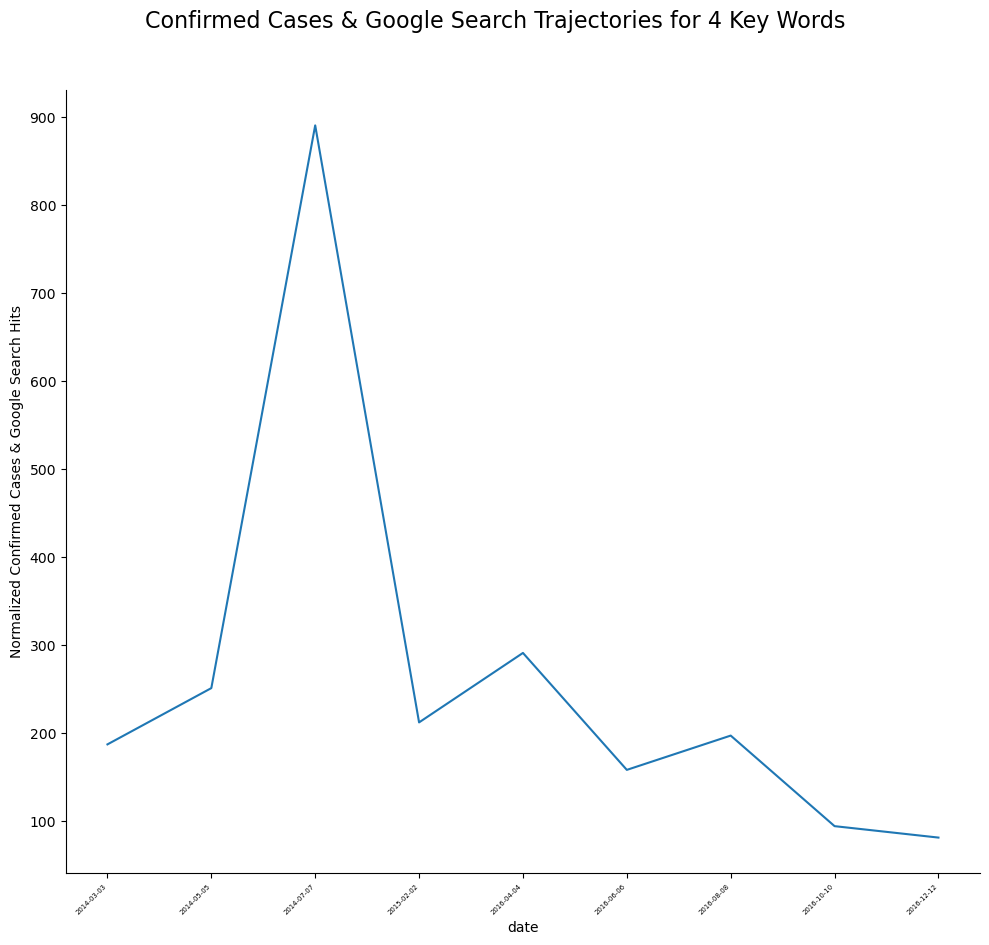

In [149]:
# this might be wrong

g = sns.relplot(x="date", y="dengue_sum",
            height=5, aspect=2, facet_kws=dict(sharex=False),
            kind="line", legend="full", data=merged_df)
g.set_xticklabels(rotation=45,fontsize=5,horizontalalignment='right')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Confirmed Cases & Google Search Trajectories for 4 Key Words', fontsize=16)
g.fig.set_figheight(10)
g.set_axis_labels(y_var="Normalized Confirmed Cases & Google Search Hits")

1. Find out months with the highest number of cases

In [150]:
date_groups = merged_df.groupby('month')['dengue_sum'].mean()

In [151]:
date_groups.nlargest()
# top 5 months with the most dengue cases across 2014-2018
# this gives us a clue on when we should start the awareness campaign

month
7    891.0
4    291.0
5    251.0
2    212.0
8    197.0
Name: dengue_sum, dtype: float64

**My plans:**
1. find out cases vs google search trends on symptoms
2. find out cases vs fogging
3. find out cases vs wolbachia
4. control by months

Text(0.5, 1.0, 'Dengue Cases and Search on Fever and Dengue keywords')

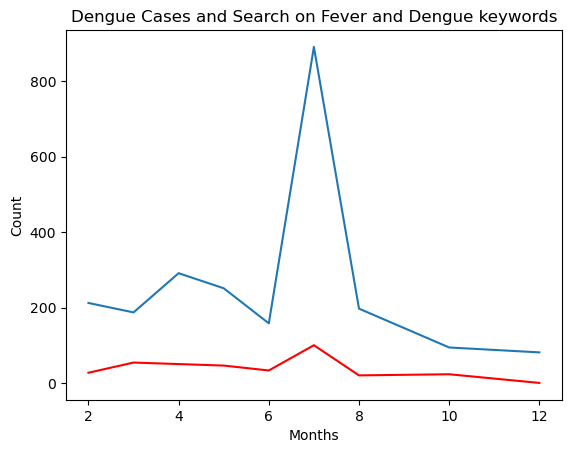

In [164]:
sns.lineplot(x='month', y='dengue_sum', data=merged_df)
sns.lineplot(x='month', y='dengue_fever_search', data=merged_df, color='red')
#sns.lineplot(x='month', y='denguefever_and_dengue', data=merged_df, color='green')
#sns.lineplot(x='month', y='vomitting_and_denguefever', data=merged_df, color='grey')

plt.xlabel('Months')
plt.ylabel('Count')
plt.title('Dengue Cases and Search on Fever and Dengue keywords')
#plt.legend(['Dengue Cases', 'Fever and Dengue', 'Dengue Fever and Dengue', 'Vomitting and Dengue Fever']) -- this doesn't work

Text(0.5, 1.0, 'Dengue Cases and Search on Dengue Fever and Dengue keywords')

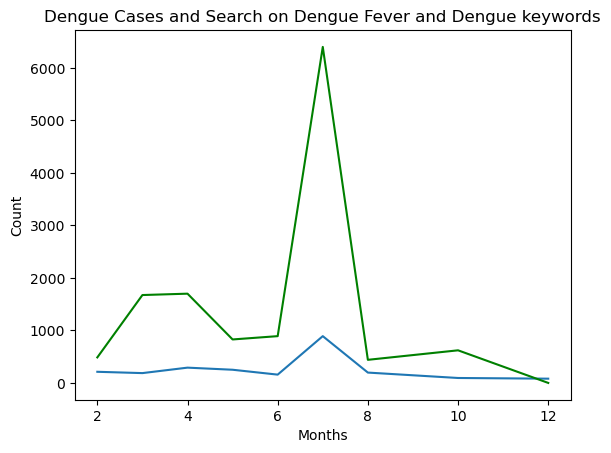

In [156]:
sns.lineplot(x='month', y='dengue_sum', data=merged_df)
#sns.lineplot(x='month', y='fever_and_dengue', data=merged_df, color='red')
sns.lineplot(x='month', y='denguefever_and_dengue', data=merged_df, color='green')
#sns.lineplot(x='month', y='vomitting_and_denguefever', data=merged_df, color='grey')

plt.xlabel('Months')
plt.ylabel('Count')
plt.title('Dengue Cases and Search on Dengue Fever and Dengue keywords')

Text(0.5, 1.0, 'Dengue Cases and Search on Vomitting and and Dengue Fever keywords')

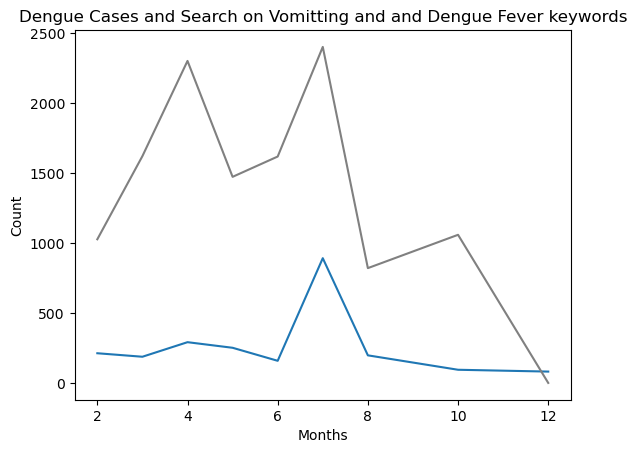

In [161]:
sns.lineplot(x='month', y='dengue_sum', data=merged_df)
#sns.lineplot(x='month', y='fever_and_dengue', data=merged_df, color='red')
#sns.lineplot(x='month', y='denguefever_and_dengue', data=merged_df, color='green')
sns.lineplot(x='month', y='rashes_sea', data=merged_df, color='grey')

plt.xlabel('Months')
plt.ylabel('Count')
plt.title('Dengue Cases and Search on Vomitting and and Dengue Fever keywords')

**Insights**:
1. The spike in cases always coincides with the spike of search trends. 
2. This is especially clear on 